#### 1. Import libraries 

In [1]:
# Import libraries for data manipulation and analysis
import pandas as pd
import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import nbformat
from tabulate import tabulate

# Import libraries for statistical analysis
from scipy import stats

# Import libraries for machine learning
from sklearn.linear_model import LinearRegression

# Set visualization styles 
sns.set(style="whitegrid") 
plt.style.use('ggplot') # or use 'seaborn-dark'

#### 2. Data Summarization

In [2]:
# Load the data with the correct delimiter
data = pd.read_csv('../src/data/MachineLearningRating_v3.txt', delimiter='|')

# Display the column names
print(data.columns)

C:\Users\Abeni\AppData\Local\Temp\ipykernel_17176\150208309.py:2: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../src/data/MachineLearningRating_v3.txt', delimiter='|')


Index(['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth',
       'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language',
       'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province',
       'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode',
       'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders',
       'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors',
       'VehicleIntroDate', 'CustomValueEstimate', 'AlarmImmobiliser',
       'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'WrittenOff',
       'Rebuilt', 'Converted', 'CrossBorder', 'NumberOfVehiclesInFleet',
       'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm',
       'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section',
       'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium',
       'TotalClaims'],
      dtype='object')


In [3]:
# Head of the data
data.head()

,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [4]:
# Calculate descriptive statistics
descriptive_stats = data[['TotalPremium', 'TotalClaims']].describe()
print(descriptive_stats)

       TotalPremium   TotalClaims
count  1.000098e+06  1.000098e+06
mean   6.190550e+01  6.486119e+01
std    2.302845e+02  2.384075e+03
min   -7.825768e+02 -1.200241e+04
25%    0.000000e+00  0.000000e+00
50%    2.178333e+00  0.000000e+00
75%    2.192982e+01  0.000000e+00
max    6.528260e+04  3.930921e+05


Convert columns to appropriate data types 

In [5]:
# Check data types
print(data.dtypes)

UnderwrittenCoverID           int64
PolicyID                      int64
TransactionMonth             object
IsVATRegistered                bool
Citizenship                  object
LegalType                    object
Title                        object
Language                     object
Bank                         object
AccountType                  object
MaritalStatus                object
Gender                       object
Country                      object
Province                     object
PostalCode                    int64
MainCrestaZone               object
SubCrestaZone                object
ItemType                     object
mmcode                      float64
VehicleType                  object
RegistrationYear              int64
make                         object
Model                        object
Cylinders                   float64
cubiccapacity               float64
kilowatts                   float64
bodytype                     object
NumberOfDoors               

In [6]:
# Display the first few rows of the TransactionMonth and VehicleIntroDate columns
print(data[['TransactionMonth', 'VehicleIntroDate']].head())

      TransactionMonth VehicleIntroDate
0  2015-03-01 00:00:00           6/2002
1  2015-05-01 00:00:00           6/2002
2  2015-07-01 00:00:00           6/2002
3  2015-05-01 00:00:00           6/2002
4  2015-07-01 00:00:00           6/2002


In [7]:
# Convert columns to appropriate data types 
data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth']) 
data['VehicleIntroDate'] = pd.to_datetime(data['VehicleIntroDate'])

# Print the data types of TransactionMonth and VehicleIntroDate
print(data['TransactionMonth'].dtype)
print(data['VehicleIntroDate'].dtype)

datetime64[ns]
datetime64[ns]


C:\Users\Abeni\AppData\Local\Temp\ipykernel_17176\55529882.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['VehicleIntroDate'] = pd.to_datetime(data['VehicleIntroDate'])


#### 3. Data Quality Assessment

In [8]:
# Check the size of the data without including the index column
data_size = data.shape[1] - 1  # Subtract 1 for the index column
print(f'The dataset contains {data.shape[0]} rows and {data_size} columns (excluding the index column).')

The dataset contains 1000098 rows and 51 columns (excluding the index column).


Check Duplicate

In [9]:
# Check for duplicated rows
duplicated_rows = data.duplicated()
print(f'Total duplicated rows: {duplicated_rows.sum()}')

# Check for duplicated columns
duplicated_columns = data.columns[data.columns.duplicated()]
print(f'Duplicated columns: {duplicated_columns}')

Total duplicated rows: 0
Duplicated columns: Index([], dtype='object')


Handling missing values

In [10]:
# Calculate the percentage of missing values for each column
missing_percentage = data.isnull().sum() / len(data) * 100

# Filter columns with missing values and sort them in descending order
missing_columns_sorted = missing_percentage[missing_percentage > 0].sort_values(ascending=False)
print(missing_columns_sorted)

NumberOfVehiclesInFleet    100.000000
CrossBorder                 99.930207
CustomValueEstimate         77.956560
WrittenOff                  64.183810
Converted                   64.183810
Rebuilt                     64.183810
NewVehicle                  15.327998
Bank                        14.594670
AccountType                  4.022806
Gender                       0.953507
MaritalStatus                0.825819
mmcode                       0.055195
VehicleType                  0.055195
make                         0.055195
VehicleIntroDate             0.055195
NumberOfDoors                0.055195
bodytype                     0.055195
kilowatts                    0.055195
cubiccapacity                0.055195
Cylinders                    0.055195
Model                        0.055195
CapitalOutstanding           0.000200
dtype: float64


In [11]:
# Remove columns with high missing percentages
columns_to_remove = ['NumberOfVehiclesInFleet', 'CrossBorder', 'CustomValueEstimate', 'WrittenOff', 'Converted', 'Rebuilt']
data = data.drop(columns=columns_to_remove)

# Fill missing values for specific columns
data['NewVehicle'].fillna(data['NewVehicle'].mode()[0], inplace=True)
data['Bank'].fillna('Unknown', inplace=True)
data['AccountType'].fillna('Unknown', inplace=True)
data['Citizenship'].fillna('Unknown', inplace=True)

# Remove rows with missing values in specific columns
columns_to_check = ['Gender', 'MaritalStatus', 'mmcode', 'VehicleType', 'make', 'VehicleIntroDate', 'NumberOfDoors', 'bodytype', 'kilowatts', 'cubiccapacity', 'Cylinders', 'Model', 'CapitalOutstanding']
data = data.dropna(subset=columns_to_check)

# Verify the changes 
missing_values_after = data.isnull().sum() 
print(missing_values_after)

C:\Users\Abeni\AppData\Local\Temp\ipykernel_17176\4059181853.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['NewVehicle'].fillna(data['NewVehicle'].mode()[0], inplace=True)
C:\Users\Abeni\AppData\Local\Temp\ipykernel_17176\4059181853.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

UnderwrittenCoverID         0
PolicyID                    0
TransactionMonth            0
IsVATRegistered             0
Citizenship                 0
LegalType                   0
Title                       0
Language                    0
Bank                        0
AccountType                 0
MaritalStatus               0
Gender                      0
Country                     0
Province                    0
PostalCode                  0
MainCrestaZone              0
SubCrestaZone               0
ItemType                    0
mmcode                      0
VehicleType                 0
RegistrationYear            0
make                        0
Model                       0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
bodytype                    0
NumberOfDoors               0
VehicleIntroDate            0
AlarmImmobiliser            0
TrackingDevice              0
CapitalOutstanding          0
NewVehicle                  0
SumInsured

Check leading or trailing whitespaces, and handling

In [12]:
# Check for leading or trailing whitespaces in the values of each column
whitespace_values = {}
for column in data.columns:
    if data[column].dtype == 'object':  # Only check for string columns
        whitespace_values[column] = data[column].str.contains(r'^\s|\s$').sum()

# Display columns with leading or trailing whitespaces in their values
for column, count in whitespace_values.items():
    if count > 0:
        print(f'Column "{column}" has {count} values with leading or trailing whitespaces.')

Column "Citizenship" has 892928 values with leading or trailing whitespaces.
Column "make" has 17154 values with leading or trailing whitespaces.
Column "CoverCategory" has 78211 values with leading or trailing whitespaces.


In [13]:
# Remove leading and trailing whitespaces from all columns
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)

C:\Users\Abeni\AppData\Local\Temp\ipykernel_17176\2095585193.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [14]:
# Check the size of the data without including the index column
data_size = data.shape[1] - 1  # Subtract 1 for the index column
print(f'The dataset contains {data.shape[0]} rows and {data_size} columns (excluding the index column).')

The dataset contains 989557 rows and 45 columns (excluding the index column).


Outlier Detection

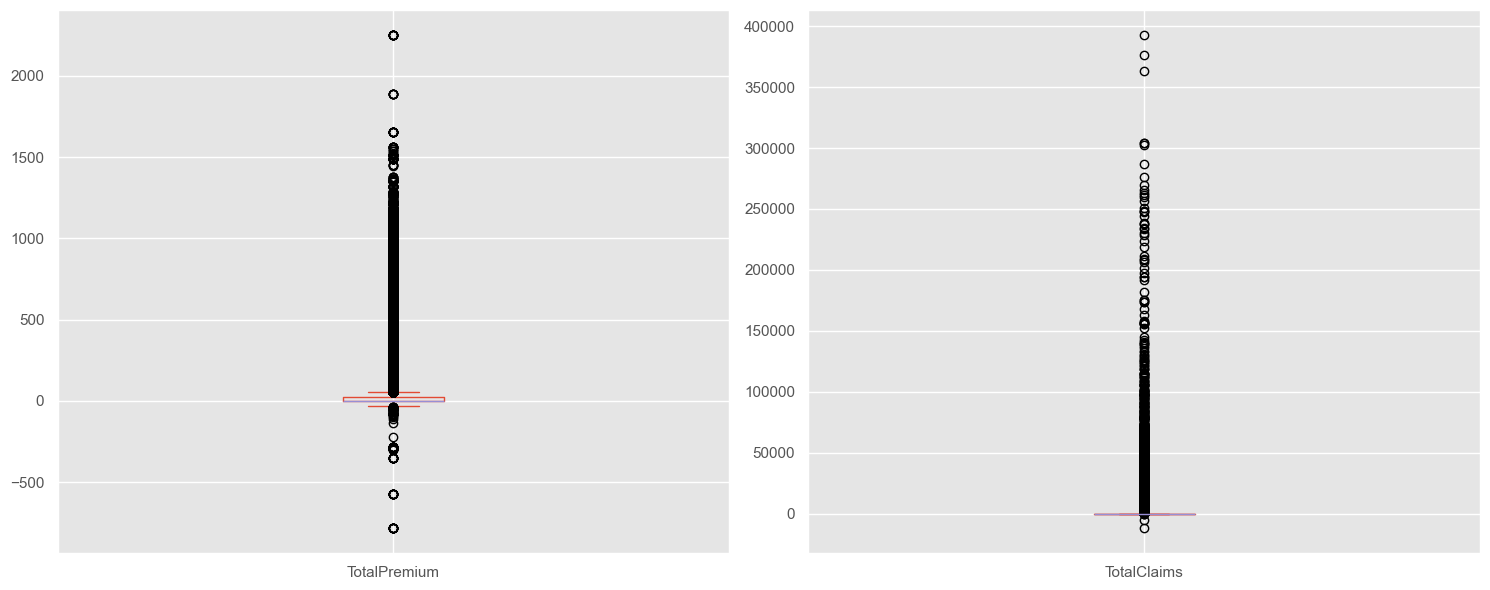

In [15]:
# Function to create a single plot with box plots for specified columns
def plot_selected_boxplots(data, columns):
    data[columns].plot(kind='box', subplots=True, layout=(1, len(columns)), figsize=(15, 6), sharex=False, sharey=False)
    plt.tight_layout()
    plt.show()

# Create a single plot with box plots for 'TotalPremium' and 'TotalClaims'
plot_selected_boxplots(data, ['TotalPremium', 'TotalClaims'])

In [16]:
# Count rows with negative values in 'TotalPremium' or 'TotalClaims'
negative_values_count = data[(data['TotalPremium'] < 0) | (data['TotalClaims'] < 0)].shape[0]

print(f"Number of rows with negative values in 'TotalPremium' or 'TotalClaims': {negative_values_count}")

Number of rows with negative values in 'TotalPremium' or 'TotalClaims': 291


In [17]:
# Remove rows with negative values in 'TotalPremium' or 'TotalClaims'
data = data[(data['TotalPremium'] >= 0) & (data['TotalClaims'] >= 0)]

# Count rows with negative values in 'TotalPremium' or 'TotalClaims'
negative_values_count = data[(data['TotalPremium'] < 0) | (data['TotalClaims'] < 0)].shape[0]

print(f"Number of rows with negative values in 'TotalPremium' or 'TotalClaims': {negative_values_count}")

Number of rows with negative values in 'TotalPremium' or 'TotalClaims': 0


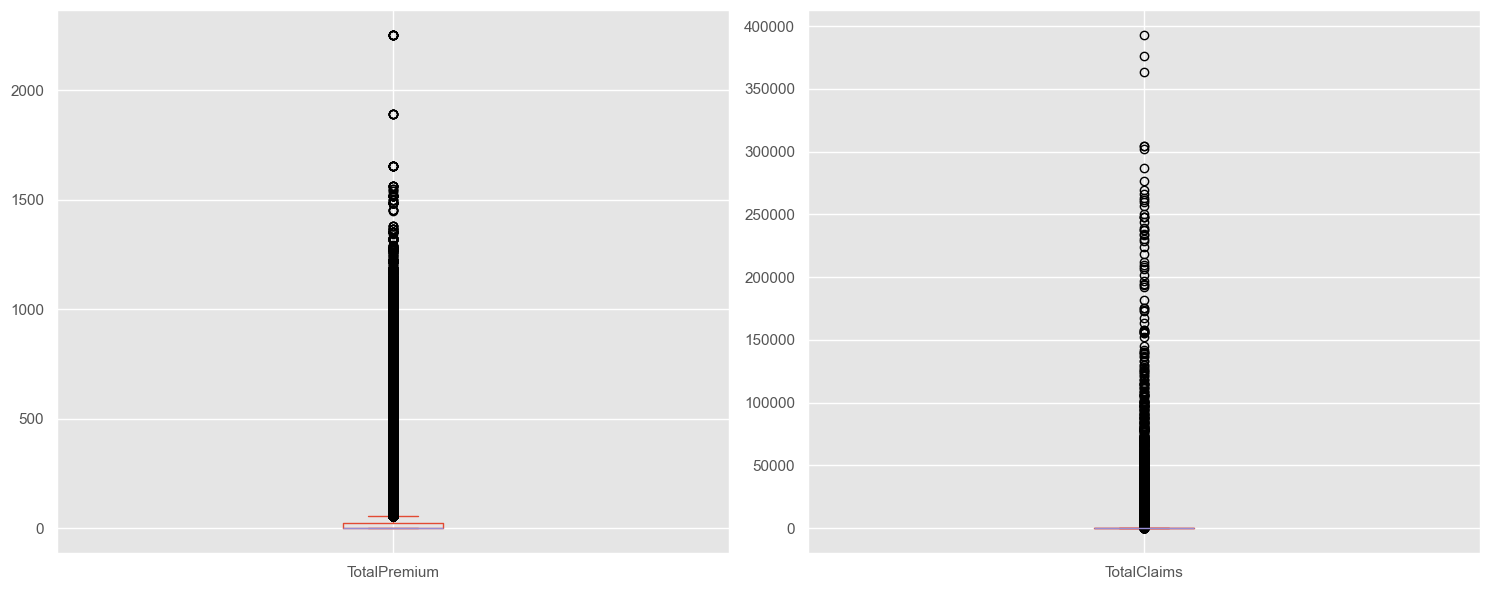

In [18]:
# Function to create a single plot with box plots for specified columns
def plot_selected_boxplots(data, columns):
    data[columns].plot(kind='box', subplots=True, layout=(1, len(columns)), figsize=(15, 6), sharex=False, sharey=False)
    plt.tight_layout()
    plt.show()

# Create a single plot with box plots for 'TotalPremium' and 'TotalClaims'
plot_selected_boxplots(data, ['TotalPremium', 'TotalClaims'])

Check Quantile Methods

In [19]:
# Define the quantile thresholds
lower_quantile = 0.01
upper_quantile = 0.99

# Calculate the quantile values for 'TotalPremium' and 'TotalClaims'
total_premium_lower = data['TotalPremium'].quantile(lower_quantile)
total_premium_upper = data['TotalPremium'].quantile(upper_quantile)
total_claims_lower = data['TotalClaims'].quantile(lower_quantile)
total_claims_upper = data['TotalClaims'].quantile(upper_quantile)

# Count the rows that would be removed
rows_to_remove = data[(data['TotalPremium'] < total_premium_lower) | (data['TotalPremium'] > total_premium_upper) |
                      (data['TotalClaims'] < total_claims_lower) | (data['TotalClaims'] > total_claims_upper)].shape[0]

print(f"Number of rows that would be removed: {rows_to_remove}")


Number of rows that would be removed: 12374


In [20]:
# Print the quantile values
print(f"TotalPremium lower quantile (1%): {total_premium_lower}")
print(f"TotalPremium upper quantile (99%): {total_premium_upper}")
print(f"TotalClaims lower quantile (1%): {total_claims_lower}")
print(f"TotalClaims upper quantile (99%): {total_claims_upper}")

TotalPremium lower quantile (1%): 0.0
TotalPremium upper quantile (99%): 778.698157894737
TotalClaims lower quantile (1%): 0.0
TotalClaims upper quantile (99%): 0.0


In [21]:
# Get a summary of 'TotalClaims'
total_claims_summary = data['TotalClaims'].describe()

print(total_claims_summary)

# Calculate the 95th and 99th percentiles for 'TotalClaims'
total_claims_95th = data['TotalClaims'].quantile(0.95)
total_claims_99th = data['TotalClaims'].quantile(0.9972)

print(f"95th percentile of 'TotalClaims': {total_claims_95th}")
print(f"99.72th percentile of 'TotalClaims': {total_claims_99th}")

# Count the number of values greater than zero in 'TotalClaims'
total_claims_greater_than_zero = data[data['TotalClaims'] > 0].shape[0]

print(f"Number of values greater than zero in 'TotalClaims': {total_claims_greater_than_zero}")

count    989266.000000
mean         64.513788
std        2374.776864
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      393092.105263
Name: TotalClaims, dtype: float64
95th percentile of 'TotalClaims': 0.0
99.72th percentile of 'TotalClaims': 0.0
Number of values greater than zero in 'TotalClaims': 2760


In [51]:
# It looks like the "TotalClaims" column has a significant number of zero values, as indicated by the 25th, 50th,75th, 95th, 99.72th percentiles all being zero. However, the mean value of 64.51 and the maximum value of 393,092.11 suggest that there are some non-zero values, including some very large ones.
# Given this distribution, the quantile method might not be the best approach for handling outliers in the "TotalClaims" column, as it results in both the lower and upper quantiles being zero

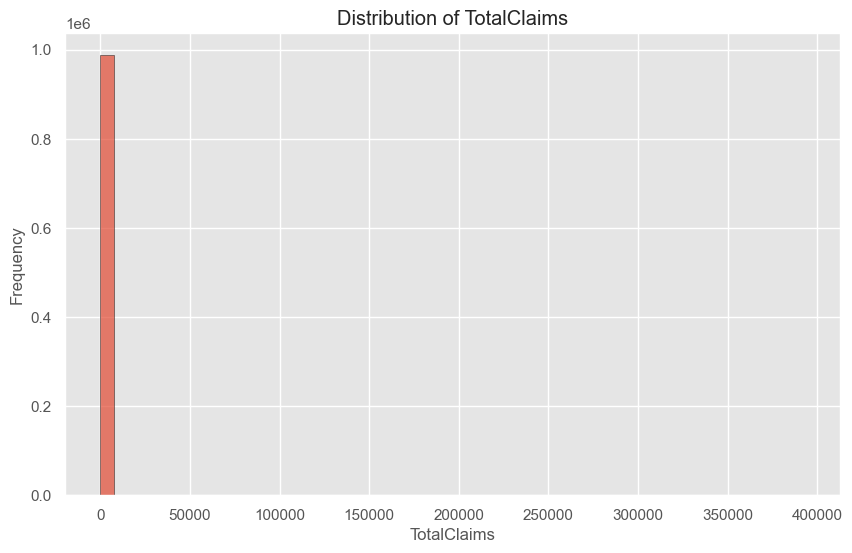

In [22]:
# Plot the distribution of 'TotalClaims'
plt.figure(figsize=(10, 6))
plt.hist(data['TotalClaims'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of TotalClaims')
plt.xlabel('TotalClaims')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Check IQR Methods

In [63]:
# Function to calculate IQR and count outliers
def count_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers.shape[0]

# Count outliers for 'TotalPremium' and 'TotalClaims'
total_premium_outliers = count_outliers_iqr(data, 'TotalPremium')
total_claims_outliers = count_outliers_iqr(data, 'TotalClaims')

print(f"Number of outliers in 'TotalPremium': {total_premium_outliers}")
print(f"Number of outliers in 'TotalClaims': {total_claims_outliers}")

Number of outliers in 'TotalPremium': 206450
Number of outliers in 'TotalClaims': 2760


In [55]:
# It looks like the IQR method identified a significant number of outliers in both "TotalPremium" and "TotalClaims". This method is more aggressive in identifying outliers compared to the quantile method.

In [23]:
data.shape

(989266, 46)

Save the cleaned data

In [24]:
# Define the path to save the cleaned data
cleaned_data_path = '../src/data/cleaned_data.csv'

# Save the cleaned data to the specified path
data.to_csv(cleaned_data_path, index=False)

print(f"Cleaned data saved to {cleaned_data_path}")


Cleaned data saved to ../src/data/cleaned_data.csv
